In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# runtime usr sys idl wai hiq siq used buff cach free recv send read writ memheap memdirect
data = np.load('experiments.npz')
kmeans, tpchq10 = data['kmeans'], data['tpchq10']

In [20]:
def twin_plot(ax, y1, y2):
    ax.plot(y1, 'b-o', label='A')
    ax_twin = ax.twinx()
    ax_twin.plot(y2, 'r-o', label='B')    

def plot_stats(data):
    x = 4*(np.arange(data.shape[0])+1)

    # plot runtime
    plt.plot(x, data[:,0]/1000/60, 'o-')
    plt.xticks(x)
    plt.xlabel('# Nodes')
    plt.ylabel('Runtime [m]')
    plt.xlim(xmin=4)
    plt.ylim(ymin=0)
    runtime_fig = plt.gcf()
    
    fig = plt.figure(figsize=(11,6))
    
    # plot cpu and wait
    ax1 = fig.add_subplot(221)
    ax1.set_xticks(x)
    ax1.plot(x, (data[:,1]+data[:,2]+data[:,3])/100., 'b-o')
    ax1.set_ylabel('CPU User', color='b')
    ax1.set_ylim(0, 1)
    
    ax1_twin = ax1.twinx()
    ax1_twin.plot(x, data[:,4]/100., 'r-o')
    ax1_twin.set_ylabel('CPU Wait', color='r')
    ax1_twin.set_ylim(bottom=0)
       
    
    # plot memory and buffer usage
    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(x, data[:,15]/1000., 'b-o')
    ax2.set_ylabel('Memory [GB]', color='b')
    ax2.set_ylim(bottom=0)
    
    ax2_twin = ax2.twinx()
    ax2_twin.plot(x, data[:,16]/1000.**2, 'r-o')
    ax2_twin.set_ylabel('Buffer [MB]', color='r')
    ax2_twin.set_ylim(bottom=0)
    
    
    # network receive and write 11 12
    ax3 = fig.add_subplot(222, sharex=ax1)
    ax3.plot(x, data[:,11]/1000.**2, 'b-o')
    ax3.set_ylabel('Net Recv [MB]', color='b')
    ax3.set_ylim(bottom=0)
    
    ax3_twin = ax3.twinx()
    ax3_twin.plot(x, data[:,12]/1000.**2, 'r-o')
    ax3_twin.set_ylabel('Net Send [MB]', color='r')
    ax3_twin.set_ylim(bottom=0)

    
    # disk and disk write 13 14
    ax4 = fig.add_subplot(224, sharex=ax1)
    ax4.plot(x, data[:,13]/1000.**2, 'b-o')
    ax4.set_ylabel('Disk Read [MB]', color='b')
    ax4.set_ylim(bottom=0)
    
    ax4_twin = ax4.twinx()
    ax4_twin.plot(x, data[:,14]/1000.**2, 'r-o')
    ax4_twin.set_ylabel('Disk Write [MB]', color='r')
    ax4_twin.set_ylim(bottom=0)

    #plt.setp([a.get_xticklabels() for a in fig.axes[:-2]], visible=False)

    fig.tight_layout()
    #fig.subplots_adjust(hspace=0)
    
    return runtime_fig, fig

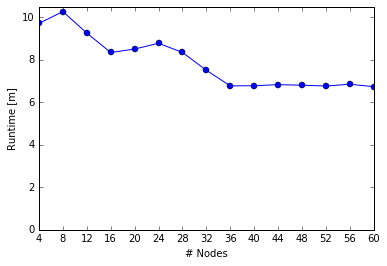

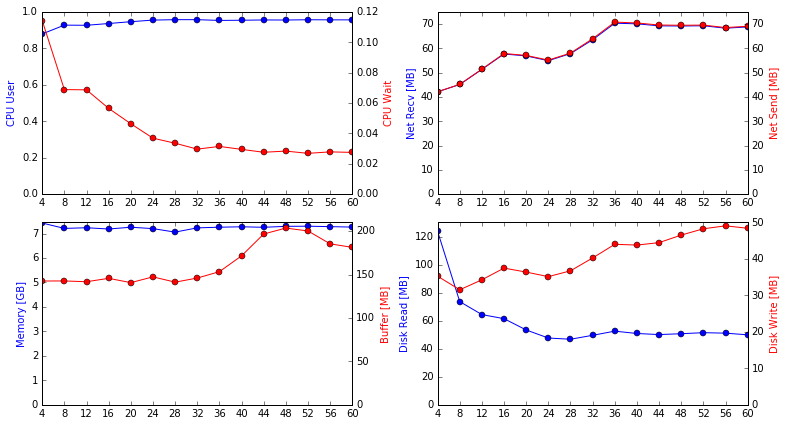

In [21]:
runtime_fig, stats_fig = plot_stats(tpchq10)
for dataset in ['tpchq10', 'kmeans']:
    runtime_fig.savefig('figures/%s_runtime.pdf' % dataset)
    stats_fig.savefig('figures/%s_stats.pdf' % dataset)